In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("/content/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
# Get the first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Get the last five rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [25]:
# Get the quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
# Get the name of all columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
# Get the shape
df.shape

(891, 12)

In [28]:
# Get the size
df.size

10692

In [29]:
# Let's describe the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
# Let's see are there any duplicates in the csv file or not
df.duplicated().sum()

0

In [31]:
# Let's group "Sex" and "Age" column
df.groupby("Sex")["Age"].mean().reset_index()

,Sex,Age
0,female,27.915709
1,male,30.726645


In [32]:
# Let's see the Nan(null) values in our file(columns specifically)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# Let's fill the Nan(null) values in the "Age" column
x = df["Age"].mean()
df["Age"].fillna(x, inplace= True)

In [34]:
# Let's drop/delete the "Cabin" column
df.drop(["Cabin"], axis = 1, inplace=True)

In [35]:
# Let's drop/delete all the Nan(null) values from our CSV file
df.dropna(inplace=True)

In [36]:
# let' check the info again after making some changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [37]:
# Let me check the number of males and females
gender = df["Sex"].value_counts()
gender

Sex
male      577
female    312
Name: count, dtype: int64

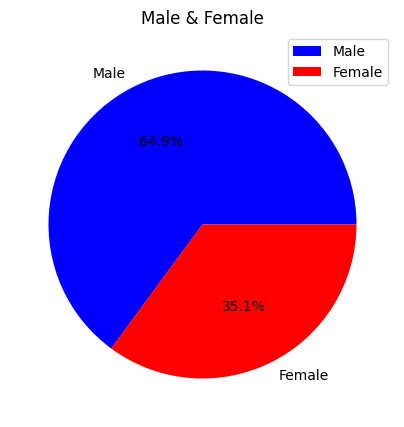

In [38]:
# let's make a pie chart of the male and female proportion
plt.figure(figsize=(5,5))
plt.pie(gender, labels = ["Male", "Female"], autopct= "%.1f%%", colors=["blue", "red"]) # The plt.pie() expects the numerical values
plt.legend()
plt.title("Male & Female")

plt.show()

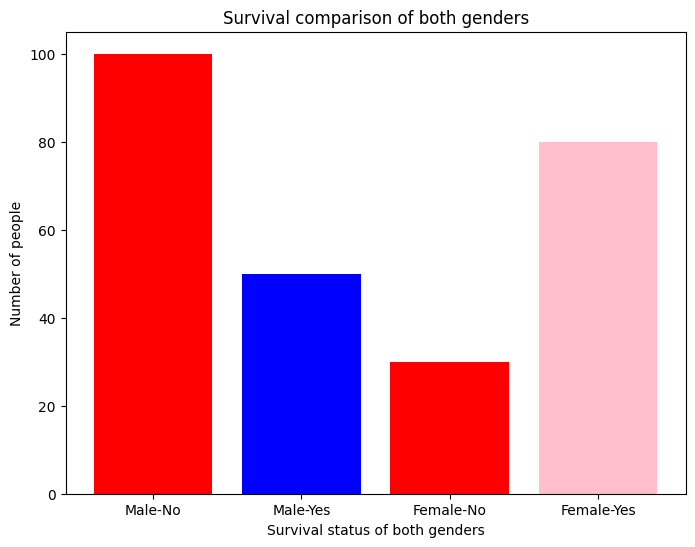

In [39]:
# Let's make a bar graph which will show that how many males and females have survived and how many were unable to survive
Actual_data = {"Survived": ["Male-No", "Male-Yes", "Female-No", "Female-Yes"],
              "Count": [100, 50, 30, 80]} # Replace it with the actual counts

Survived = pd.DataFrame(Actual_data)

plt.figure(figsize= (8,6))
plt.bar(Survived["Survived"], Survived["Count"], color = ["red", "blue", "red", "pink"])
plt.xticks(Survived["Survived"])
plt.title("Survival comparison of both genders")
plt.xlabel("Survival status of both genders")
plt.ylabel("Number of people")

plt.show()

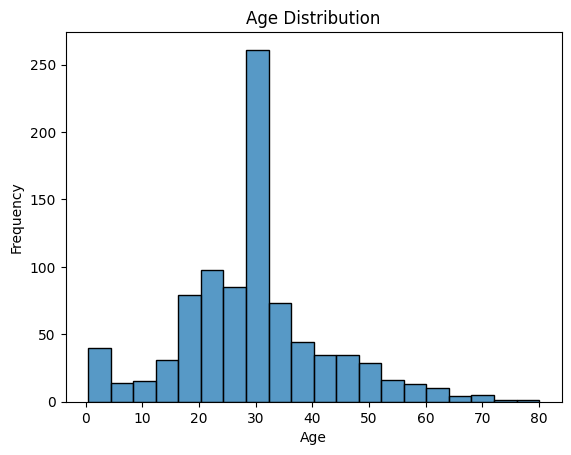

In [40]:
# let's check the proportion of age with the help of a histogram
sns.histplot(data=df, x="Age", bins= 20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

In [41]:
Survived_sex = df[["Survived", "Sex"]].value_counts().reset_index()
Survived_sex

,Survived,Sex,count
0,0,male,468
1,1,female,231
2,1,male,109
3,0,female,81


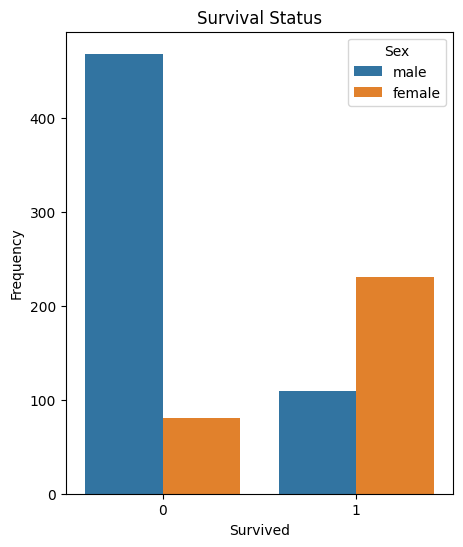

In [42]:
plt.figure(figsize=(5,6))
sns.barplot(data=Survived_sex, x = Survived_sex["Survived"], y = Survived_sex["count"], hue = Survived_sex["Sex"])
plt.title("Survival Status")
plt.xlabel("Survived")
plt.ylabel("Frequency")
plt.show()

In [43]:
Embarked_sex = df[["Embarked", "Sex"]].value_counts().reset_index()
Embarked_sex

,Embarked,Sex,count
0,S,male,441
1,S,female,203
2,C,male,95
3,C,female,73
4,Q,male,41
5,Q,female,36


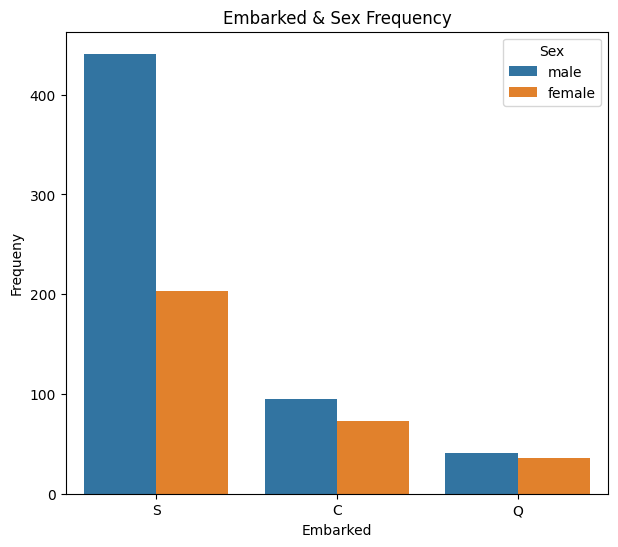

In [44]:
plt.figure(figsize=(7,6))
sns.barplot(data=Embarked_sex, x=Embarked_sex["Embarked"], y=Embarked_sex["count"], hue=Embarked_sex["Sex"])
plt.title("Embarked & Sex Frequency")
plt.xlabel("Embarked")
plt.ylabel("Frequeny")

plt.show()

In [45]:
Survived_embarked = df[["Survived", "Embarked"]].value_counts().reset_index()
Survived_embarked

,Survived,Embarked,count
0,0,S,427
1,1,S,217
2,1,C,93
3,0,C,75
4,0,Q,47
5,1,Q,30


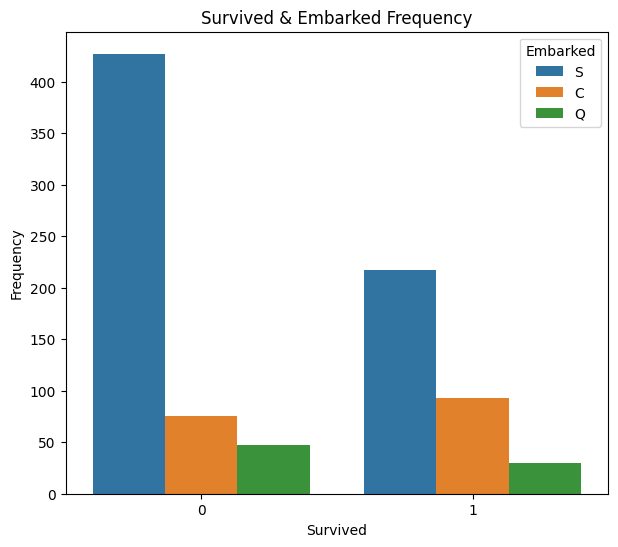

In [46]:
plt.figure(figsize= (7,6))
sns.barplot(data=Survived_embarked, x=Survived_embarked["Survived"], y=Survived_embarked["count"], hue=Survived_embarked["Embarked"])
plt.title("Survived & Embarked Frequency")
plt.xlabel("Survived")
plt.ylabel("Frequency")

plt.show()

In [47]:
Survived_pclass = df[["Survived", "Pclass"]].value_counts().reset_index()
Survived_pclass

,Survived,Pclass,count
0,0,3,372
1,1,1,134
2,1,3,119
3,0,2,97
4,1,2,87
5,0,1,80


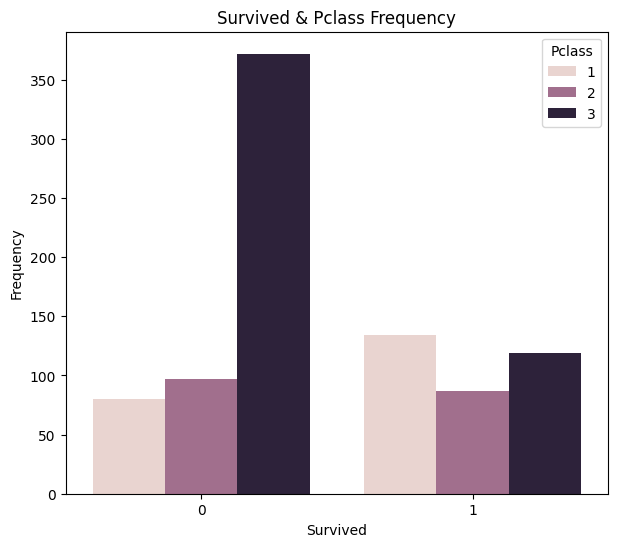

In [48]:
plt.figure(figsize= (7,6))
sns.barplot(data=Survived_pclass, x=Survived_pclass["Survived"], y=Survived_pclass["count"], hue=Survived_pclass["Pclass"])
plt.title("Survived & Pclass Frequency")
plt.xlabel("Survived")
plt.ylabel("Frequency")

plt.show()

In [49]:
Sibling = df[["SibSp"]].value_counts().reset_index()
Sibling

,SibSp,count
0,0,606
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


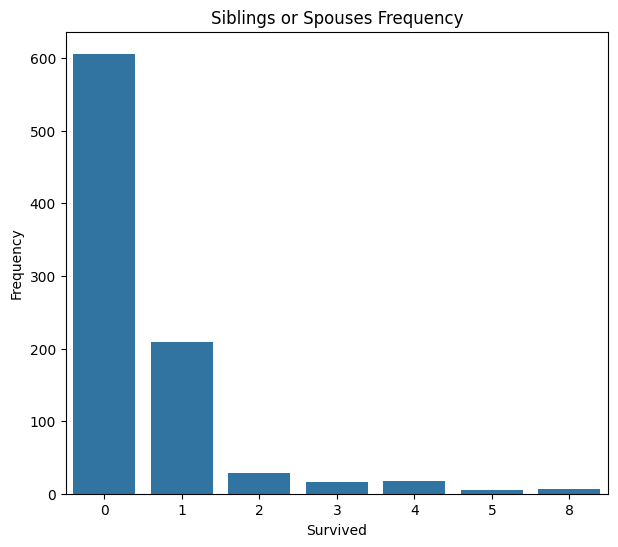

In [50]:
plt.figure(figsize=(7,6))
sns.barplot(data=Sibling, x=Sibling["SibSp"], y=Sibling["count"])
plt.title("Siblings or Spouses Frequency")
plt.xlabel("Survived")
plt.ylabel("Frequency")

plt.show()

In [51]:
# Let's see how many siblings have survived
Survived_siblings = df[["Survived", "SibSp"]].value_counts().reset_index()
Survived_siblings

,Survived,SibSp,count
0,0,0,398
1,1,0,208
2,1,1,112
3,0,1,97
4,0,2,15
5,0,4,15
6,1,2,13
7,0,3,12
8,0,8,7
9,0,5,5


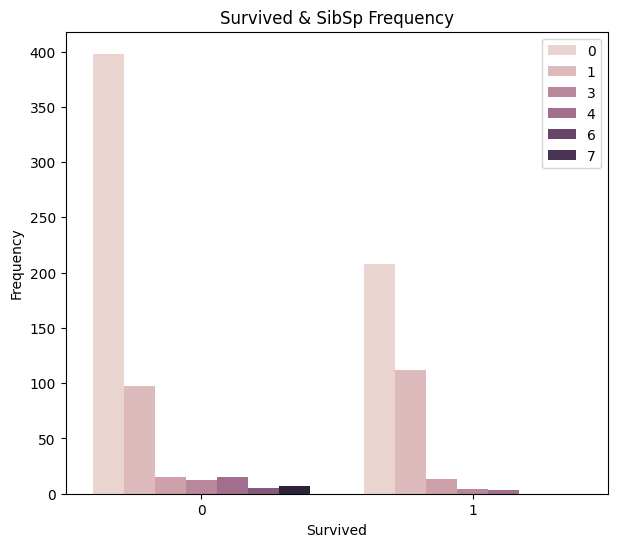

In [52]:
# Let's make a barchart of all the siblings who have survived
plt.figure(figsize= (7,6))
sns.barplot(data=Survived_siblings, x=Survived_siblings["Survived"], y=Survived_siblings["count"], hue=Survived_siblings["SibSp"])
plt.legend(loc = "upper right")
plt.title("Survived & SibSp Frequency")
plt.xlabel("Survived")
plt.ylabel("Frequency")

plt.show()

In [53]:
# Let's drop some columns
test = df.drop(["PassengerId", "Name", "Ticket"], axis=1)
test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [54]:
# Let's use the LabelEncoder
label_encoder = LabelEncoder()

In [56]:
test["Sex"] = label_encoder.fit_transform(test["Sex"])
test["Embarked"] = label_encoder.fit_transform(test["Embarked"])
test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [57]:
# let's drop a column
x = test.drop(["Survived"], axis=1)
y = test["Survived"]

In [24]:
# Data Preprocessing
# Fill missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

# Convert categorical variables to numerical
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])


In [14]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



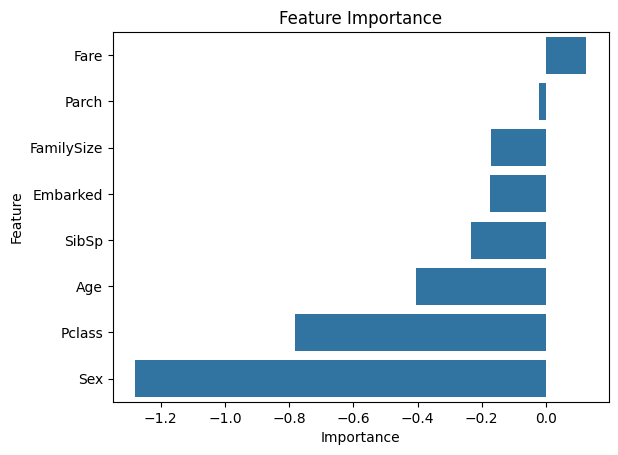

In [15]:
# Feature Importance
importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()